In [103]:
# Imports

import sys
print(sys.version_info)

try:
    import numpy as np
    import pandas as pd
    import skfuzzy as fuzz
    import matplotlib.pyplot as plt
    from random import sample, choice
    from skfuzzy import control as ctrl
    from deap import base, creator, tools, algorithms
    from sklearn.metrics import mean_absolute_error, accuracy_score
    from random import choice, uniform  
    from sklearn.model_selection import train_test_split
except:
    %pip install -U numpy matplotlib scikit-fuzzy
    %pip install deap

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [57]:
# Load the first 100 rows of the dataset
data = pd.read_csv('winequality-white.csv', sep=';')

# Split the data into features (X) and target (Y)
X = data[['alcohol', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'volatile acidity']]
Y = data['quality']

# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 2938
Validation set size: 980
Test set size: 980


In [58]:
# Function to generate triangular membership sets

def extract_key_values(x):
    MIN = min(x)
    MAX = max(x)
    
    a = 1.5  
    b = 0.5
    c = 0.5
    
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.50)  
    q3 = np.quantile(x, 0.75)
    
    LL = max(MIN, q1 - a * (q3 - q1))
    HL = min(MAX, q3 + a * (q3 - q1))
    
    v1 = c * (LL - MIN)
    v2 = c * (MAX - HL)
    
    # Define triangular membership functions (three points each)
    ol = [MIN, MIN, LL]         
    low = [MIN, q1, q2]         
    normal = [q1, q2, q3]       
    high = [q2, q3, HL]         
    oh = [HL, MAX, MAX]         
    
    return ol, low, normal, high, oh, MIN, MAX


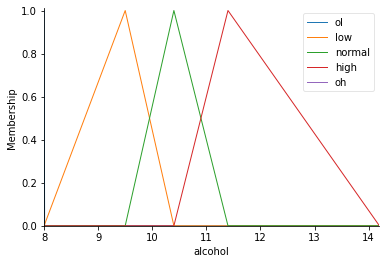

In [59]:
# Define fuzzy sets for alcohol
ol_alcohol, low_alcohol, normal_alcohol, high_alcohol, oh_alcohol, alcohol_min, alcohol_max = extract_key_values(X.iloc[:, 0])
alcohol = ctrl.Antecedent(np.arange(alcohol_min, alcohol_max, 0.01), 'alcohol')

alcohol['ol'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), ol_alcohol)
alcohol['low'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), low_alcohol)
alcohol['normal'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), normal_alcohol)
alcohol['high'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), high_alcohol)
alcohol['oh'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), oh_alcohol)

alcohol.view()  

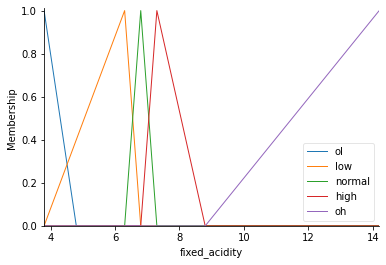

In [60]:
# Define fuzzy sets for fixed acidity
ol_fixed_acidity, low_fixed_acidity, normal_fixed_acidity, high_fixed_acidity, oh_fixed_acidity, fixed_acidity_min, fixed_acidity_max = extract_key_values(X.iloc[:, 1])
fixed_acidity = ctrl.Antecedent(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), 'fixed_acidity')

fixed_acidity['ol'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), ol_fixed_acidity)
fixed_acidity['low'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), low_fixed_acidity)
fixed_acidity['normal'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), normal_fixed_acidity)
fixed_acidity['high'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), high_fixed_acidity)
fixed_acidity['oh'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), oh_fixed_acidity)

fixed_acidity.view()


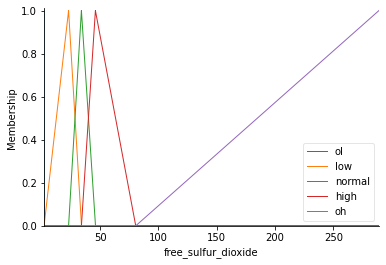

In [61]:
# Define fuzzy sets for free sulfur dioxide
ol_free_sulfur_dioxide, low_free_sulfur_dioxide, normal_free_sulfur_dioxide, high_free_sulfur_dioxide, oh_free_sulfur_dioxide, free_sulfur_dioxide_min, free_sulfur_dioxide_max = extract_key_values(X.iloc[:, 2])
free_sulfur_dioxide = ctrl.Antecedent(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), 'free_sulfur_dioxide')

free_sulfur_dioxide['ol'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), ol_free_sulfur_dioxide)
free_sulfur_dioxide['low'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), low_free_sulfur_dioxide)
free_sulfur_dioxide['normal'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), normal_free_sulfur_dioxide)
free_sulfur_dioxide['high'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), high_free_sulfur_dioxide)
free_sulfur_dioxide['oh'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), oh_free_sulfur_dioxide)

free_sulfur_dioxide.view()

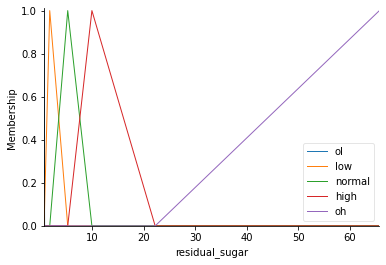

In [62]:
# Define fuzzy sets for Residual Sugar
ol_sugar, low_sugar, normal_sugar, high_sugar, oh_sugar, sugar_min, sugar_max = extract_key_values(X.iloc[:, 3])
sugar = ctrl.Antecedent(np.arange(sugar_min, sugar_max, 0.1), 'residual_sugar')

sugar['ol'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), ol_sugar)
sugar['low'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), low_sugar)
sugar['normal'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), normal_sugar)
sugar['high'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), high_sugar)
sugar['oh'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), oh_sugar)

sugar.view()  

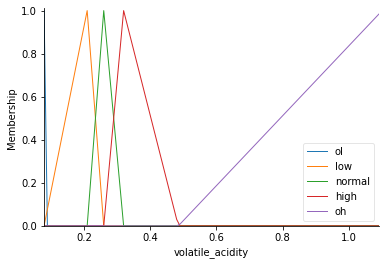

In [63]:
# Define fuzzy sets for volatile acidity
ol_volatile_acidity, low_volatile_acidity, normal_volatile_acidity, high_volatile_acidity, oh_volatile_acidity, volatile_acidity_min, volatile_acidity_max = extract_key_values(X.iloc[:, 4])
volatile_acidity = ctrl.Antecedent(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), 'volatile_acidity')

volatile_acidity['ol'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), ol_volatile_acidity)
volatile_acidity['low'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), low_volatile_acidity)
volatile_acidity['normal'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), normal_volatile_acidity)
volatile_acidity['high'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), high_volatile_acidity)
volatile_acidity['oh'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), oh_volatile_acidity)

volatile_acidity.view()

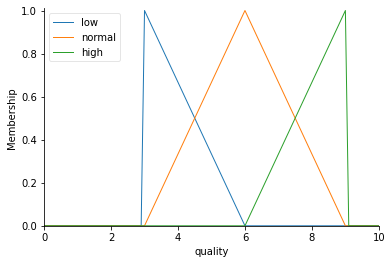

In [64]:
# Define the output variable: wine quality
quality = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'quality')  

min_quality = min(Y)
max_quality = max(Y)

quality['low'] = fuzz.trimf(quality.universe, [min_quality, min_quality, 6])      
quality['normal'] = fuzz.trimf(quality.universe, [min_quality, 6, max_quality])   
quality['high'] = fuzz.trimf(quality.universe, [6, max_quality, max_quality])   

quality.view()


In [65]:
# List of all antecedent variables
antecedents = ['sugar', 'volatile_acidity', 'alcohol', 'fixed_acidity', 'free_sulfur_dioxide']

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
n_rules = 100

toolbox = base.Toolbox()

# Define random rule generation for each pair of antecedents
def generate_rule():
    antecedent_pair = sample(antecedents, 2)  # Select two random antecedents
    return [
        (antecedent_pair[0], choice(['ol', 'low', 'normal', 'high', 'oh'])),
        (antecedent_pair[1], choice(['ol', 'low', 'normal', 'high', 'oh'])),
        choice(['low', 'normal', 'high'])  # Consequent for quality
    ]

toolbox.register("attr_rule", generate_rule)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_rule, n=n_rules)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation Function
def evaluate(individual):
    rule_list = []
    for antecedent1, antecedent2, consequent in individual:
        # Get the fuzzy variables and membership functions
        antecedent_var1 = eval(antecedent1[0])
        antecedent_level1 = antecedent1[1]
        antecedent_var2 = eval(antecedent2[0])
        antecedent_level2 = antecedent2[1]
        
        consequent_level = consequent
        
        # Define fuzzy rule based on the individual
        rule = ctrl.Rule(
            antecedent_var1[antecedent_level1] & antecedent_var2[antecedent_level2],
            quality[consequent_level]
        )
        rule_list.append(rule)
    
    # Create control system and simulation
    system = ctrl.ControlSystem(rule_list)
    simulator = ctrl.ControlSystemSimulation(system)
    
    # Evaluate using mean absolute error or other metric
    predictions = np.zeros(len(X))
    for i, row in X.iterrows():
        try:
            simulator.input['sugar'] = row['sugar']
            simulator.input['volatile_acidity'] = row['volatile acidity']
            simulator.input['alcohol'] = row['alcohol']
            simulator.input['fixed_acidity'] = row['fixed acidity']
            simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
            simulator.compute()
            predictions[i] = simulator.output['quality']
        except:
            predictions[i] = 0  # Handle errors in computation
        
    mae = mean_absolute_error(Y, predictions)
    return (mae,)

# Register the evaluate function
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Execute Genetic Algorithm
population = toolbox.population(n=30)
NGEN = 10
CXPB = 0.7
MUTPB = 0.1

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Output the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)

c:\FIA\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\FIA\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best individual: [[('sugar', 'ol'), ('fixed_acidity', 'oh'), 'low'], [('free_sulfur_dioxide', 'low'), ('sugar', 'normal'), 'high'], [('sugar', 'ol'), ('alcohol', 'high'), 'high'], [('free_sulfur_dioxide', 'normal'), ('volatile_acidity', 'ol'), 'high'], [('alcohol', 'oh'), ('fixed_acidity', 'normal'), 'high'], [('free_sulfur_dioxide', 'ol'), ('alcohol', 'ol'), 'normal'], [('free_sulfur_dioxide', 'low'), ('alcohol', 'low'), 'normal'], [('volatile_acidity', 'low'), ('sugar', 'low'), 'low'], [('free_sulfur_dioxide', 'low'), ('alcohol', 'high'), 'low'], [('free_sulfur_dioxide', 'low'), ('alcohol', 'oh'), 'low'], [('free_sulfur_dioxide', 'normal'), ('alcohol', 'ol'), 'low'], [('fixed_acidity', 'oh'), ('free_sulfur_dioxide', 'high'), 'high'], [('free_sulfur_dioxide', 'low'), ('sugar', 'low'), 'low'], [('volatile_acidity', 'normal'), ('free_sulfur_dioxide', 'ol'), 'low'], [('sugar', 'oh'), ('free_sulfur_dioxide', 'high'), 'normal'], [('sugar', 'ol'), ('alcohol', 'high'), 'normal'], [('volatile

In [66]:
rule_list=[]

# Recreate rules from the optimized best individual
for antecedent1, antecedent2, consequent in best_individual:
    # Extract variable names and membership levels
    antecedent_var1 = eval(antecedent1[0])
    antecedent_level1 = antecedent1[1]
    antecedent_var2 = eval(antecedent2[0])
    antecedent_level2 = antecedent2[1]
    consequent_level = consequent

    # Define the rule for each gene in the optimized individual
    rule = ctrl.Rule(
        antecedent_var1[antecedent_level1] & antecedent_var2[antecedent_level2],
        quality[consequent_level]
    )
    rule_list.append(rule)

#print(rule_list)      

# Update control system with optimized rules
system = ctrl.ControlSystem(rule_list)
optimized_simulator = ctrl.ControlSystemSimulation(system)

In [67]:
# Evaluate MAE on the training set using the optimized rules

train_predictions = np.zeros(len(X_train))  # Preallocate with zeros

# Predictions for training set
for i, (_, row) in enumerate(X_train.iterrows()):
    # Set inputs for each variable
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        train_predictions[i] = optimized_simulator.output['quality'] 
    except Exception as e:
        print("ERROR: Error getting prediction!")
        train_predictions[i] = 0  # Assign a default value directly if error

# Calculate the MAE for the training set
train_mae = mean_absolute_error(Y_train, train_predictions)
print("Training MAE: {:.2f}".format(train_mae))

Training MAE: 0.71


In [68]:
# Evaluate MAE on the validation set using the optimized rules

validation_predictions = np.zeros(len(X_val))  # Preallocate with zeros for validation predictions

for i, (_, row) in enumerate(X_val.iterrows()):
    # Set inputs for each variable
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        validation_predictions[i] = optimized_simulator.output['quality']
    except Exception as e:
        print("ERROR: Error getting prediction!")
        validation_predictions[i] = 0  # Assign a default value if an error occurs

# Calculate the MAE for the validation set
val_mae = mean_absolute_error(Y_val, validation_predictions)
print("Validation MAE: {:.2f}".format(val_mae))

Validation MAE: 0.70


In [69]:
# Evaluate MAE on the test set using the optimized rules

test_predictions = np.zeros(len(X_test))  # Preallocate with zeros for test predictions

for i, (_, row) in enumerate(X_test.iterrows()):
    # Set inputs for each variable
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        test_predictions[i] = optimized_simulator.output['quality']
    except Exception as e:
        print("ERROR: Error getting prediction!")
        test_predictions[i] = 0  # Assign a default value if an error occurs

# Calculate the MAE for the test set
test_mae = mean_absolute_error(Y_test, test_predictions)
print("Test MAE: {:.2f}".format(test_mae))

Test MAE: 0.70


alcohol                10.50
fixed acidity           6.00
free sulfur dioxide    56.00
residual sugar          5.70
volatile acidity        0.25
Name: 3641, dtype: float64 

Predicted Quality: 6.00
Actual Quality: 6.00


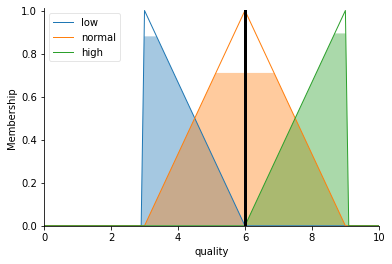

In [97]:
## Example

sample_index = 0
sample = X_test.iloc[sample_index]
print(sample, "\n")

# Set the inputs for the optimized simulator
optimized_simulator.input['alcohol'] = sample['alcohol']
optimized_simulator.input['fixed_acidity'] = sample['fixed acidity']
optimized_simulator.input['free_sulfur_dioxide'] = sample['free sulfur dioxide']
optimized_simulator.input['residual_sugar'] = sample['residual sugar']
optimized_simulator.input['volatile_acidity'] = sample['volatile acidity']

# Run the simulation
optimized_simulator.compute()

# Print the predicted quality
try:
    predicted_quality = optimized_simulator.output['quality']
    print("Predicted Quality: {:.2f}".format(predicted_quality))
except KeyError:
    print("ERROR: Quality output not available for the provided input!")

# Print the actual quality using the correct index from Y_test
actual_quality = Y_test.iloc[sample_index]
print("Actual Quality: {:.2f}".format(actual_quality))


quality.view(sim=optimized_simulator)

Test Accuracy: 42.65%


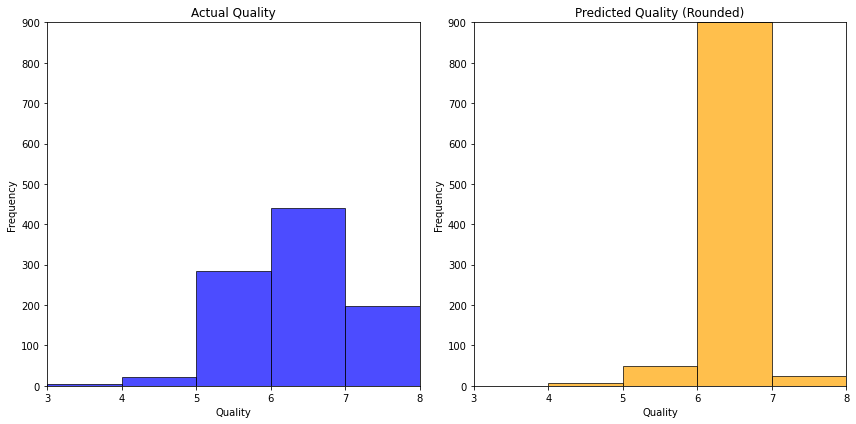

In [104]:
# Histograms

# Round predicted values to the closest integer
rounded_test_predictions = np.round(test_predictions)

# Calculate accuracy by comparing rounded predictions with actual values
test_accuracy = accuracy_score(Y_test, rounded_test_predictions)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Define common axis limits for consistency in both plots
x_min = min(Y_test.min(), rounded_test_predictions.min())
x_max = max(Y_test.max(), rounded_test_predictions.max())
y_max = max(
    np.histogram(Y_test, bins=range(int(x_min), int(x_max) + 2))[0].max(),
    np.histogram(rounded_test_predictions, bins=range(int(x_min), int(x_max) + 2))[0].max()
)

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for actual quality values
plt.subplot(1, 2, 1)
plt.hist(Y_test, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Actual Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Histogram for predicted quality values
plt.subplot(1, 2, 2)
plt.hist(rounded_test_predictions, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded)')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Show plots
plt.tight_layout()
plt.show()